# Importing Libraries

In [1]:
#inporting Libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('hranalysisdata.csv')

In [3]:
df

employee_id         department     region  education gender  \
0             8724         Technology  region_26  Bachelors      m   
1            74430                 HR   region_4  Bachelors      f   
2            72255  Sales & Marketing  region_13  Bachelors      m   
3            38562        Procurement   region_2  Bachelors      f   
4            64486            Finance  region_29  Bachelors      m   
...            ...                ...        ...        ...    ...   
17412        64573         Technology   region_7  Bachelors      f   
17413        49584                 HR   region_7  Bachelors      m   
17414        49584                 HR   region_7  Bachelors      m   
17415        49584                 HR   region_7  Bachelors      m   
17416        64573                 HR   region_7  Bachelors      f   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   24                   NaN   
1                   other                1   31                   3.0   
2                   other                1   31                   1.0   
3                   other                3   31                   2.0   
4                sourcing                1   30                   4.0   
...                   ...              ...  ...                   ...   
17412            referred                2   30                   5.0   
17413               other                1   33                   1.0   
17414               other                1   33                   1.0   
17415               other                1   33                   1.0   
17416            referred                1   35                   5.0   

       length_of_service  KPIs_met_more_than_80  awards_won  \
0                      1                      1           0   
1                      5                      0           0   
2                      4                      0           0   
3                      9                      0           0   
4                      7                      0           0   
...                  ...                    ...         ...   
17412                  6                      1           0   
17413                  9                      0           0   
17414                  9                      0           0   
17415                  9                      0           0   
17416                  4                      1           0   

       avg_training_score  
0                      77  
1                      51  
2                      47  
3                      65  
4                      61  
...                   ...  
17412                  81  
17413                  51  
17414                  51  
17415                  51  
17416                  81  

[17417 rows x 13 columns]

# Data Cleaning

In [4]:
#changed the column names of no_of_traings and length_of_service
df.columns = ['Employee_ID', 'Department', 'Region', 'Education', 'Gender',
       'Recruitment_Channel', 'No_Of_Trainings_Attended', 'Age', 'Previous_Year_Rating',
       'Duration_Of_Service', 'KPIs_Met_More_Than_80', 'Awards_Won',
       'Avg_Training_Score']

In [317]:
df.isna().sum()

Employee_ID                 0
Department                  0
Region                      0
Education                   0
Gender                      0
Recruitment_Channel         0
No_Of_Trainings_Attended    0
Age                         0
Previous_Year_Rating        0
Duration_Of_Service         0
KPIs_Met_More_Than_80       0
Awards_Won                  0
Avg_Training_Score          0
Random_Variable             0
Normal_Random_Variable      0
dtype: int64

In [319]:
df.shape

(17414, 15)

In [5]:
df.head() #Top 5 Rows

Employee_ID         Department     Region  Education Gender  \
0         8724         Technology  region_26  Bachelors      m   
1        74430                 HR   region_4  Bachelors      f   
2        72255  Sales & Marketing  region_13  Bachelors      m   
3        38562        Procurement   region_2  Bachelors      f   
4        64486            Finance  region_29  Bachelors      m   

  Recruitment_Channel  No_Of_Trainings_Attended  Age  Previous_Year_Rating  \
0            sourcing                         1   24                   NaN   
1               other                         1   31                   3.0   
2               other                         1   31                   1.0   
3               other                         3   31                   2.0   
4            sourcing                         1   30                   4.0   

   Duration_Of_Service  KPIs_Met_More_Than_80  Awards_Won  Avg_Training_Score  
0                    1                      1           0                  77  
1                    5                      0           0                  51  
2                    4                      0           0                  47  
3                    9                      0           0                  65  
4                    7                      0           0                  61

In [313]:
#so here in employee_id column there is a 17414 unique values but in our dataset 
#there is a 17417 rows so employee_id is unique id number, so there is a 3 duplicates id's
# are present now we need to delete that rows
df_cleaned = df.drop_duplicates(subset='Employee_ID', keep='first',inplace = True)

In [315]:
#in education column there is a nan values so filled with mode 
df['Education']= df['Education'].fillna(df['Education'].mode()[0])

# descriptive stats

In [6]:
df.describe()

Employee_ID  No_Of_Trainings_Attended           Age  \
count  17417.000000              17417.000000  17417.000000   
mean   39083.491129                  1.250732     34.807774   
std    22707.024087                  0.595692      7.694046   
min        3.000000                  1.000000     20.000000   
25%    19281.000000                  1.000000     29.000000   
50%    39122.000000                  1.000000     33.000000   
75%    58838.000000                  1.000000     39.000000   
max    78295.000000                  9.000000     60.000000   

       Previous_Year_Rating  Duration_Of_Service  KPIs_Met_More_Than_80  \
count          16054.000000         17417.000000           17417.000000   
mean               3.345459             5.801860               0.358845   
std                1.265386             4.175533               0.479675   
min                1.000000             1.000000               0.000000   
25%                3.000000             3.000000               0.000000   
50%                3.000000             5.000000               0.000000   
75%                4.000000             7.000000               1.000000   
max                5.000000            34.000000               1.000000   

         Awards_Won  Avg_Training_Score  
count  17417.000000        17417.000000  
mean       0.023368           63.176322  
std        0.151074           13.418179  
min        0.000000           39.000000  
25%        0.000000           51.000000  
50%        0.000000           60.000000  
75%        0.000000           75.000000  
max        1.000000           99.000000

In [7]:
df['Employee_ID'].nunique()

17414

In [10]:
df['Department'].unique()

array(['Technology', 'HR', 'Sales & Marketing', 'Procurement', 'Finance',
       'Analytics', 'Operations', 'Legal', 'R&D'], dtype=object)

In [11]:
df['Department'].value_counts() #department wise employees strngth

Department
Sales & Marketing    5458
Operations           3524
Procurement          2240
Technology           2199
Analytics            1697
HR                    830
Finance               802
Legal                 332
R&D                   332
Name: count, dtype: int64

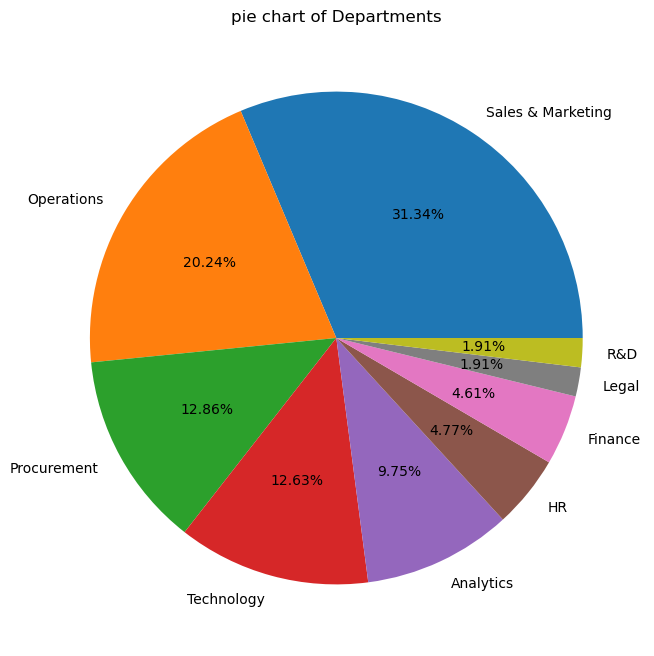

In [12]:
#the below bar chart shows the percentage of employees working in each department
plt.figure(figsize=(20,8))
A = df["Department"].value_counts().index
B = df["Department"].value_counts().values
plt.pie(B,labels=A,autopct='%1.2f%%')
plt.title('pie chart of Departments')
plt.show()


In [13]:
df['Region'].value_counts().values

array([3918, 1990, 1485,  860,  843,  748,  646,  571,  516,  452,  430,
        420,  376,  318,  315,  308,  268,  265,  252,  248,  242,  220,
        209,  209,  209,  174,  165,  156,  134,  129,  123,  110,   91,
         14], dtype=int64)

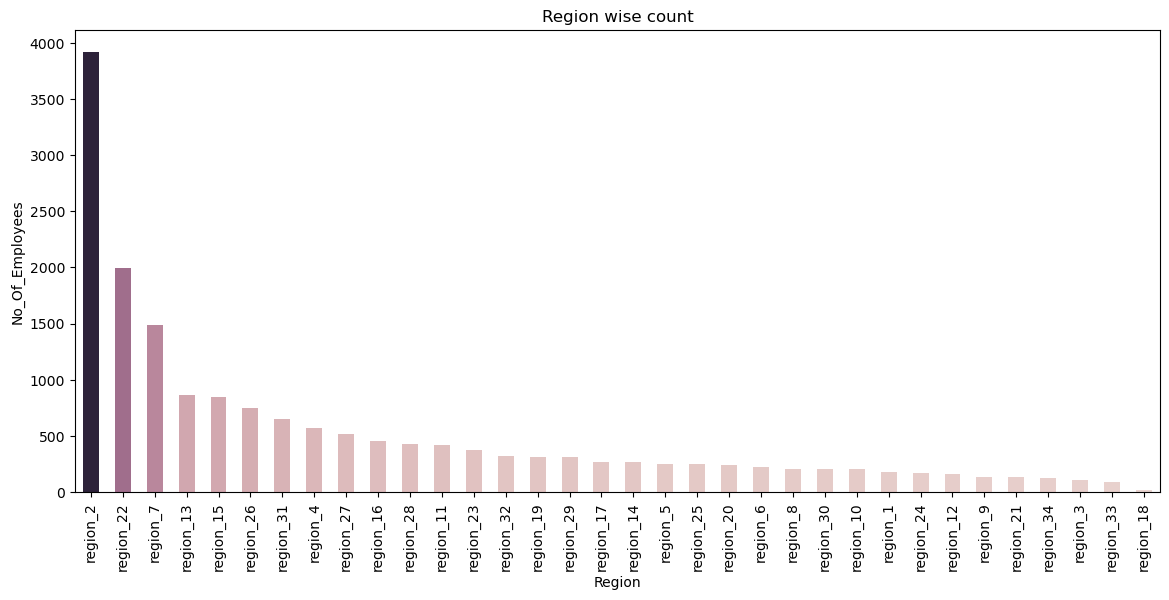

In [14]:
plt.figure(figsize = (14,6))
sns.barplot(x = df['Region'].value_counts().index,y= df['Region'].value_counts().values,hue=df['Region'].value_counts().values,width=0.5,legend=False)
plt.xticks(rotation = 90)
plt.title('Region wise count')
plt.ylabel('No_Of_Employees')
plt.show()

In [15]:
df['Education'].isna().sum()

771

In [16]:
df['Education'].value_counts()

Education
Bachelors          11516
Masters & above     4841
Below Secondary      286
Name: count, dtype: int64

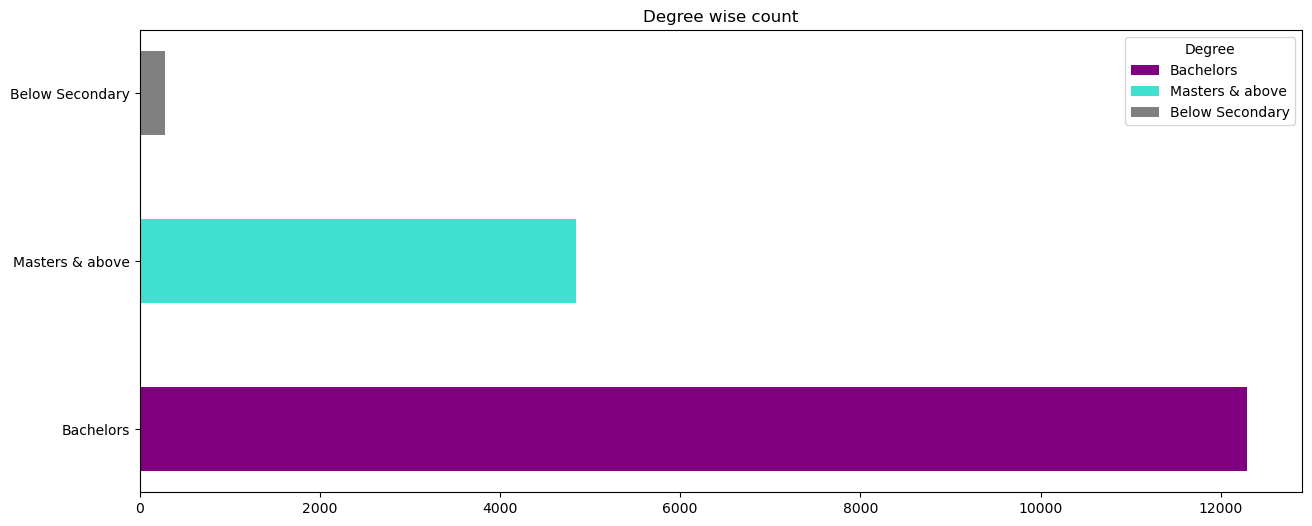

In [18]:
plt.figure(figsize=(15,6))
A = df["Education"].value_counts().index
B = df["Education"].value_counts().values
bar_labels = df["Education"].value_counts().index
bar_colors = ['#800080', '#40E0D0','#808080']
plt.barh(A,B,label=bar_labels, color=bar_colors,height=0.5)
plt.title('Degree wise count')
plt.legend(title='Degree')
plt.show()

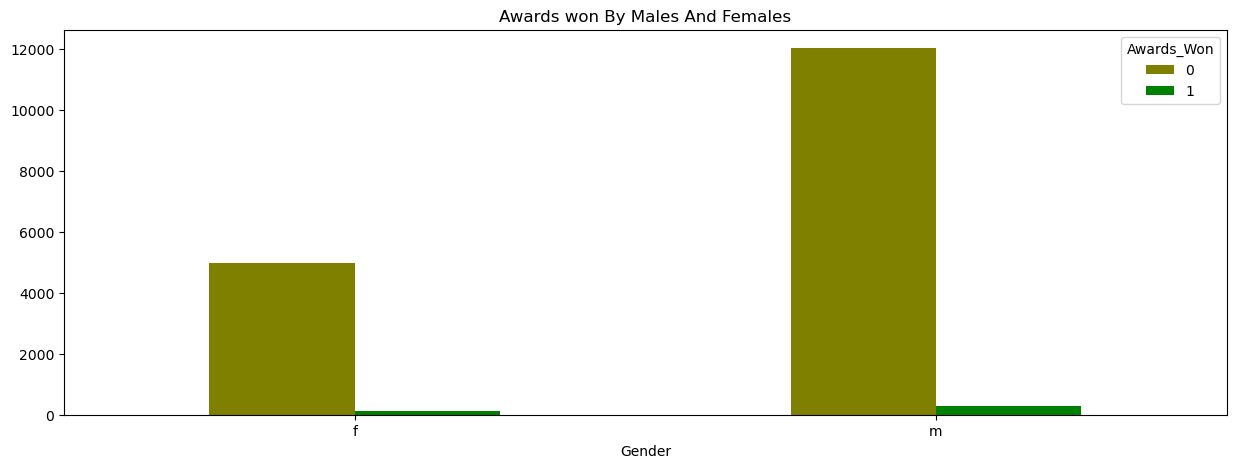

In [19]:
colors = [ '#808000','#008000']
pd.crosstab(df["Gender"],df["Awards_Won"]).plot(kind = "bar",figsize = (15,5),color=colors,width=0.5)
plt.xticks(rotation = 360)
plt.title('Awards won By Males And Females')
plt.show()

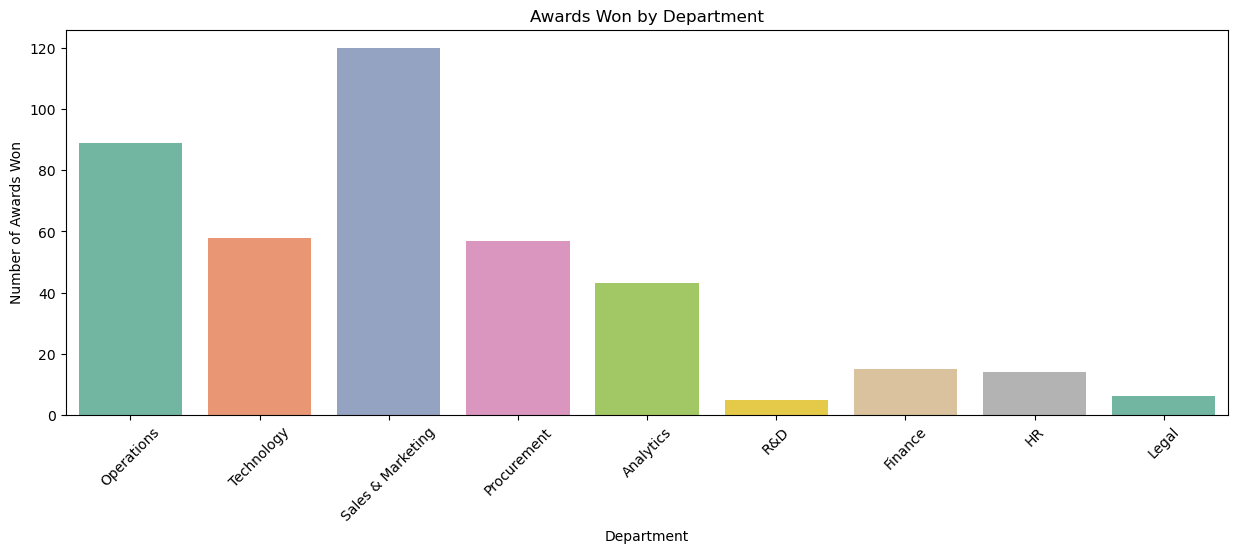

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(x='Department', data=df[df['Awards_Won'] == 1],hue='Department', palette='Set2')
plt.title('Awards Won by Department')
plt.xlabel('Department')
plt.ylabel('Number of Awards Won')
plt.xticks(rotation=45)  
plt.show()

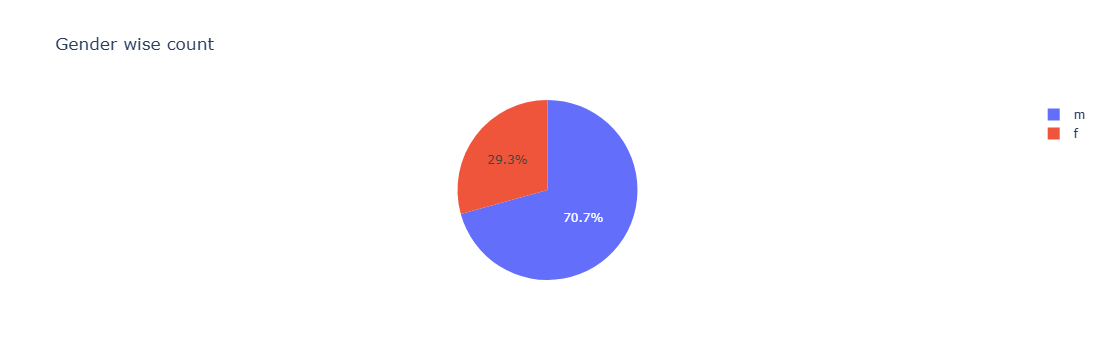

In [21]:

A = df['Gender'].value_counts().reset_index()
A.columns = ['Gender','count']
fig = px.pie(A, values='count', names='Gender', title='Gender wise count')
fig.show()

In [162]:
A = pd.DataFrame(df.groupby('Gender')['Department'].value_counts())
A

count
Gender Department              
f      Operations          1462
       Sales & Marketing   1023
       Procurement         1010
       Technology           851
       HR                   345
       Finance              202
       Analytics            159
       Legal                 31
       R&D                   19
m      Sales & Marketing   4435
       Operations          2062
       Analytics           1538
       Technology          1348
       Procurement         1230
       Finance              600
       HR                   485
       R&D                  313
       Legal                301

In [154]:
#pivot table shows that in which each department how many males and females are there
A.pivot_table(index = "Department", columns = "Gender",aggfunc =["sum"])

sum      
                  count      
Gender                f     m
Department                   
Analytics           159  1538
Finance             202   600
HR                  345   485
Legal                31   301
Operations         1462  2062
Procurement        1010  1230
R&D                  19   313
Sales & Marketing  1023  4435
Technology          851  1348

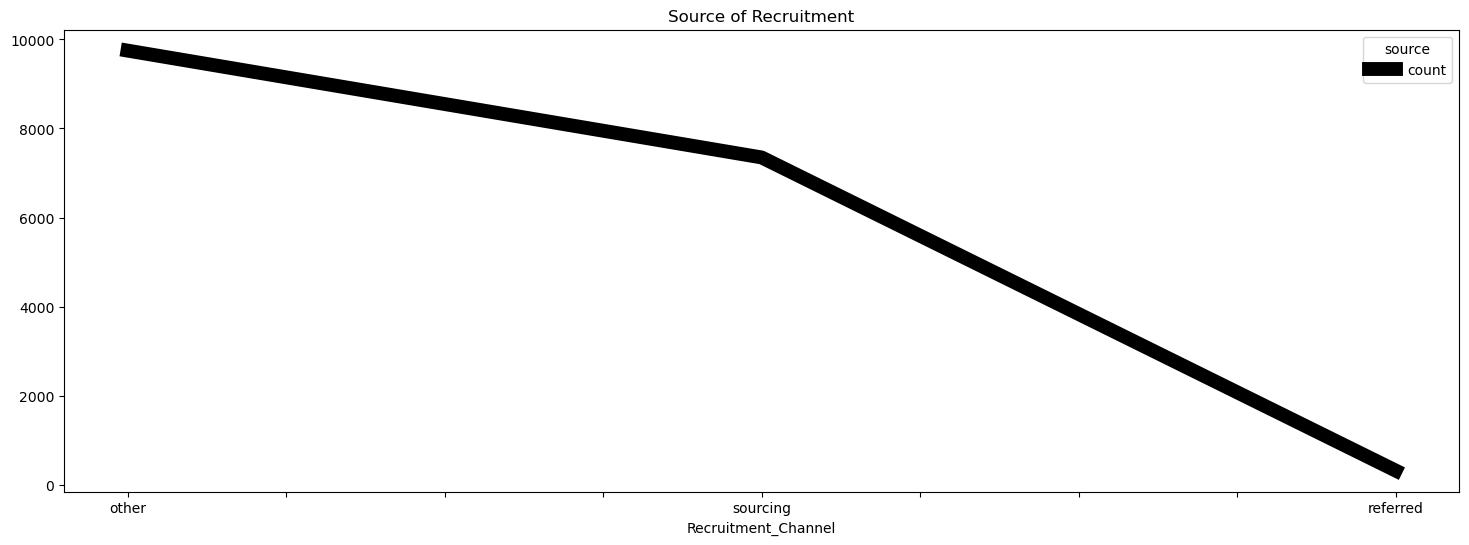

In [24]:
plt.figure(figsize=(18,6))
df['Recruitment_Channel'].value_counts().plot(kind='line',color='k',linewidth=10)
plt.title("Source of Recruitment")
plt.legend(title='source')
plt.show()

In [25]:
df['No_Of_Trainings_Attended'].value_counts()

No_Of_Trainings_Attended
1    14058
2     2628
3      539
4      137
5       26
6       16
7        6
8        2
9        2
Name: count, dtype: int64

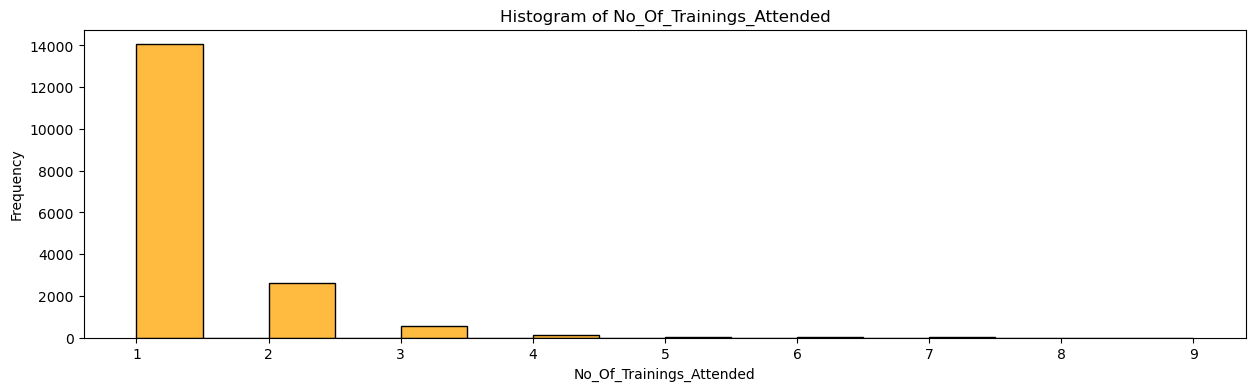

In [26]:
plt.figure(figsize=(15,4))
sns.histplot(df['No_Of_Trainings_Attended'],color='#FFA500',edgecolor='k')
plt.title('Histogram of No_Of_Trainings_Attended')
plt.xlabel('No_Of_Trainings_Attended')
plt.ylabel('Frequency')
plt.show()

In [27]:
df['Age'].value_counts().values

array([1173, 1140, 1077, 1074, 1032, 1023,  955,  890,  864,  771,  684,
        636,  621,  569,  509,  437,  429,  337,  325,  265,  261,  227,
        201,  187,  178,  163,  156,  154,  129,  121,  120,  107,  102,
         90,   76,   76,   68,   60,   57,   42,   28], dtype=int64)

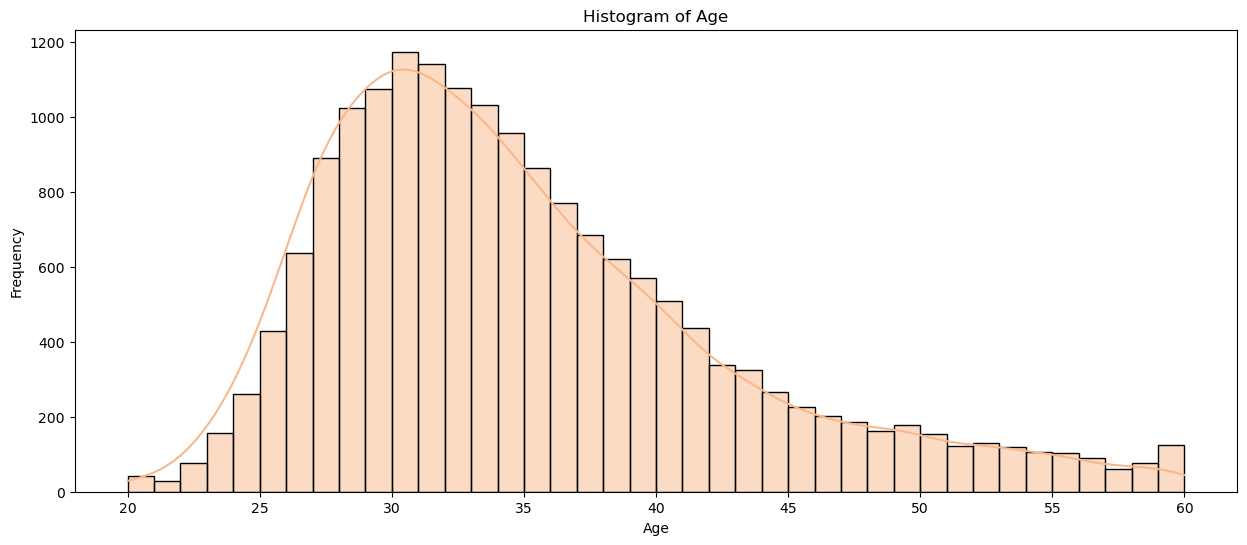

In [28]:
plt.figure(figsize=(15, 6))
sns.histplot(df['Age'], kde=True,color='#F8B88B',edgecolor='k',bins=40)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

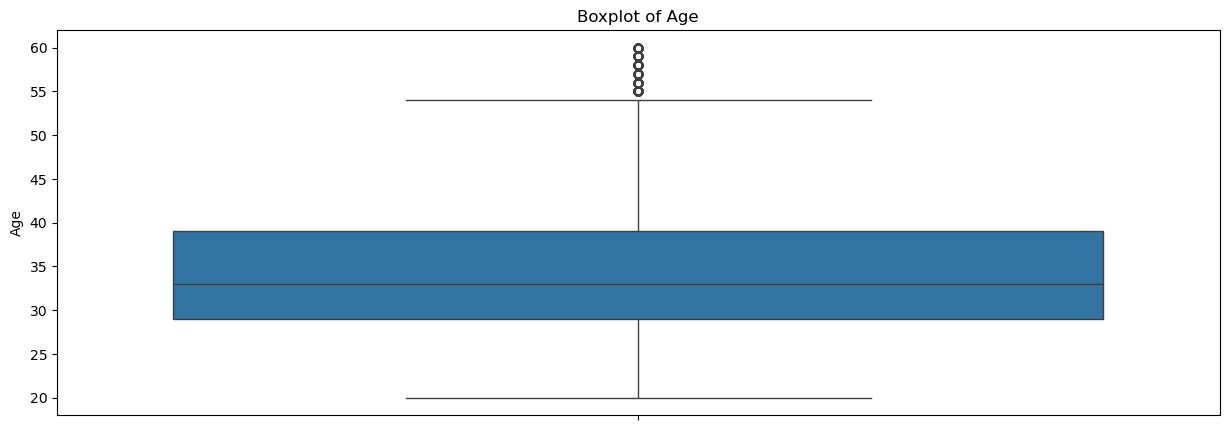

In [29]:
plt.figure(figsize=(15,5))
sns.boxplot(df['Age'])
plt.title('Boxplot of Age')
plt.show()

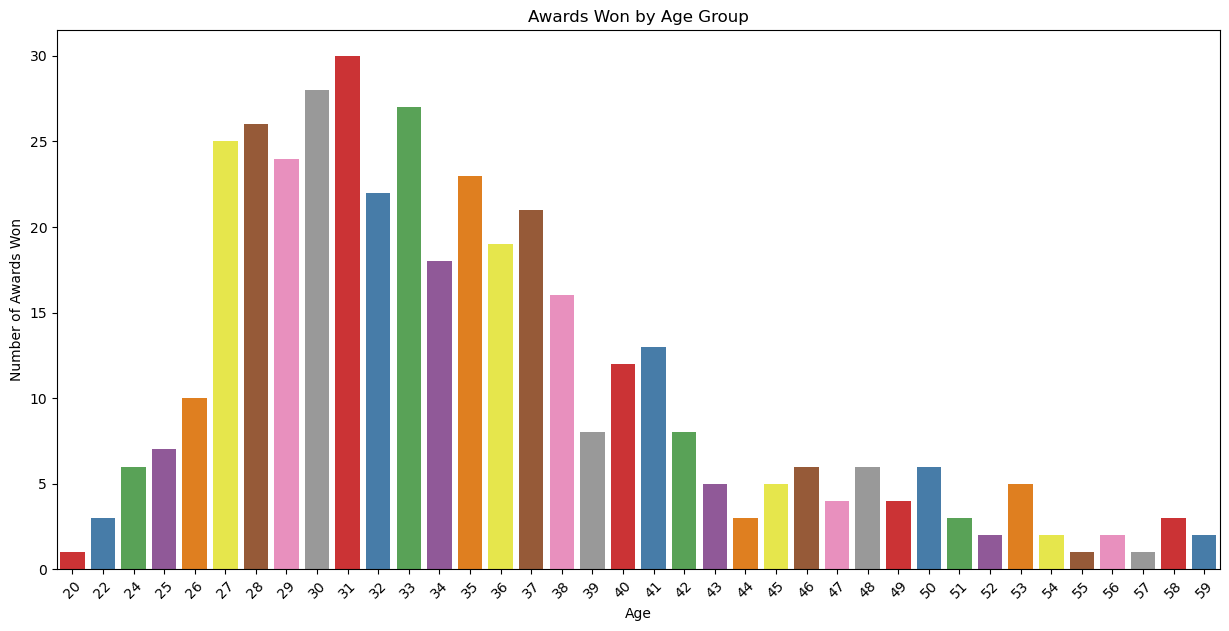

In [30]:
plt.figure(figsize=(15,7))
sns.countplot(x='Age', data=df[df['Awards_Won'] == 1],hue='Age',legend=False, palette='Set1')
plt.title('Awards Won by Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Awards Won')
plt.xticks(rotation=45)  
plt.show()

In [31]:
df['Previous_Year_Rating'].value_counts().values

array([5813, 3816, 3156, 1974, 1292], dtype=int64)

In [32]:
df['Previous_Year_Rating'] = df['Previous_Year_Rating'].fillna(round(df['Previous_Year_Rating'].mean()))


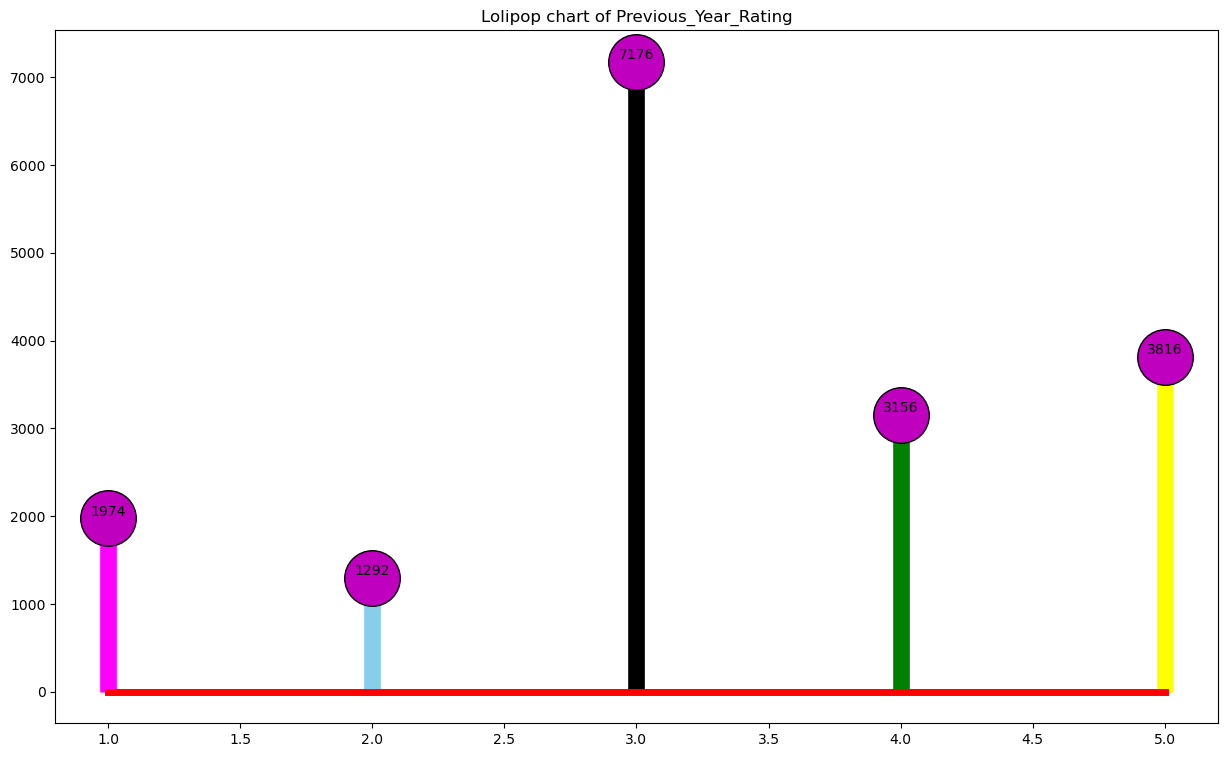

In [33]:
plt.figure(figsize=(15,9))
line_colors = ['black', 'yellow', 'green', 'magenta', 
               'skyblue', 'brown'] 
markerline, stemlines, baseline = plt.stem(df['Previous_Year_Rating'].value_counts().index, 
                                           df['Previous_Year_Rating'].value_counts().values)
plt.setp(stemlines, 'linewidth', 12,'color',line_colors) 
plt.setp(markerline, 'markerfacecolor', 'm', 'markeredgecolor', 'k','markersize', 40)
plt.setp(baseline, 'color', 'r', 'linewidth', 5)
plt.title('Lolipop chart of Previous_Year_Rating')
for i, (x, y) in enumerate(zip(df['Previous_Year_Rating'].value_counts().index, 
                               df['Previous_Year_Rating'].value_counts().values)):
     plt.text(x, y, f'{y}', ha='center', va='bottom')
plt.show()

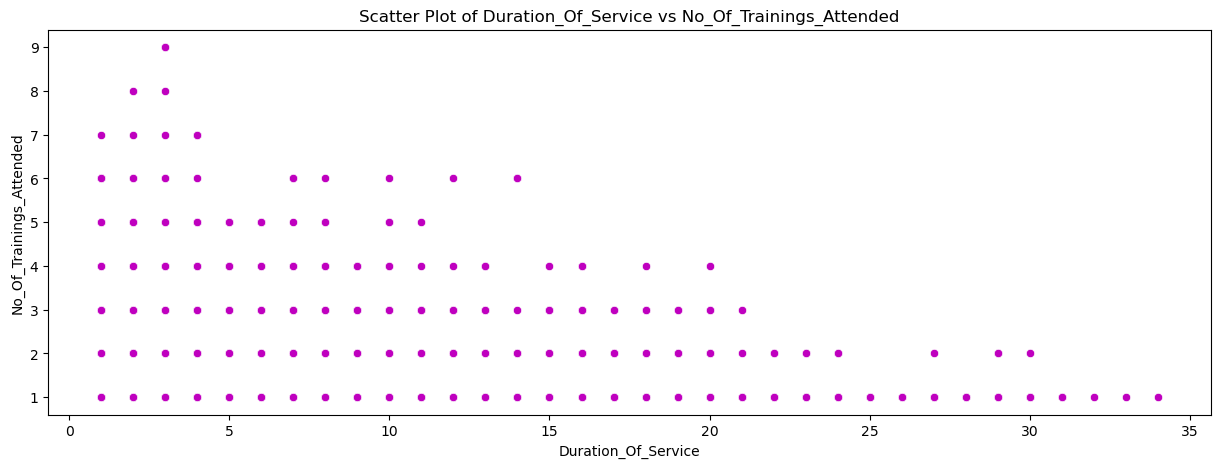

In [36]:
plt.figure(figsize=(15,5))
sns.scatterplot(x=df['Duration_Of_Service'], y=df['No_Of_Trainings_Attended'], data=df,color='m')
plt.title('Scatter Plot of Duration_Of_Service vs No_Of_Trainings_Attended')
plt.xlabel('Duration_Of_Service')
plt.ylabel('No_Of_Trainings_Attended')
plt.show()

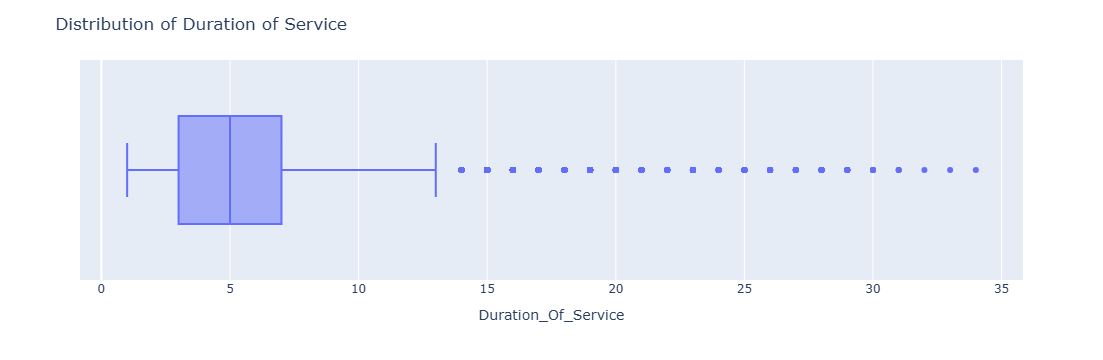

In [34]:
fig = px.box(df, x="Duration_Of_Service")
fig.update_layout(title="Distribution of Duration of Service")
fig.show()

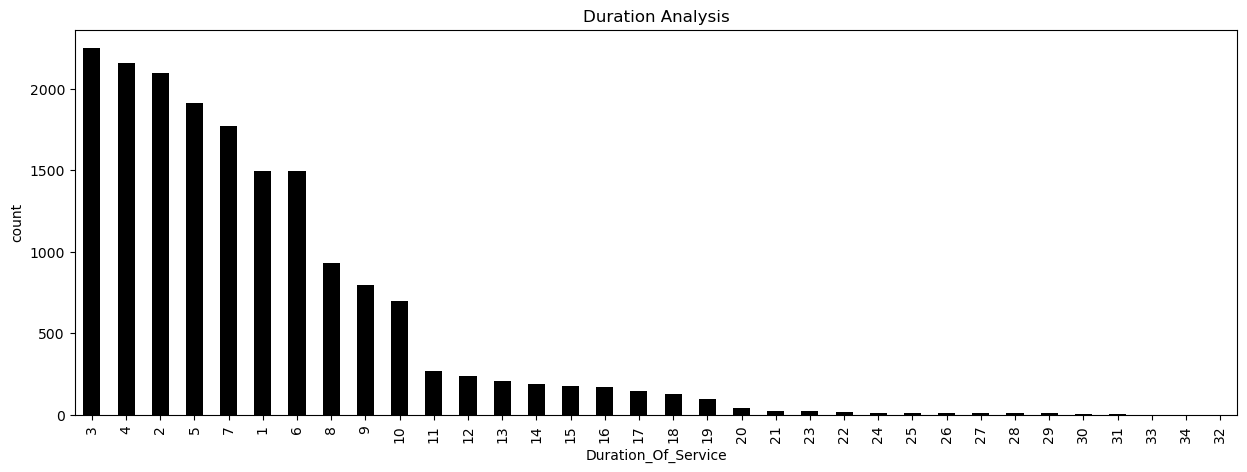

In [296]:
plt.figure(figsize=(15,5))
df['Duration_Of_Service'].value_counts().plot(kind='bar',color='k')
plt.ylabel('count')
plt.title('Duration Analysis')
plt.show()

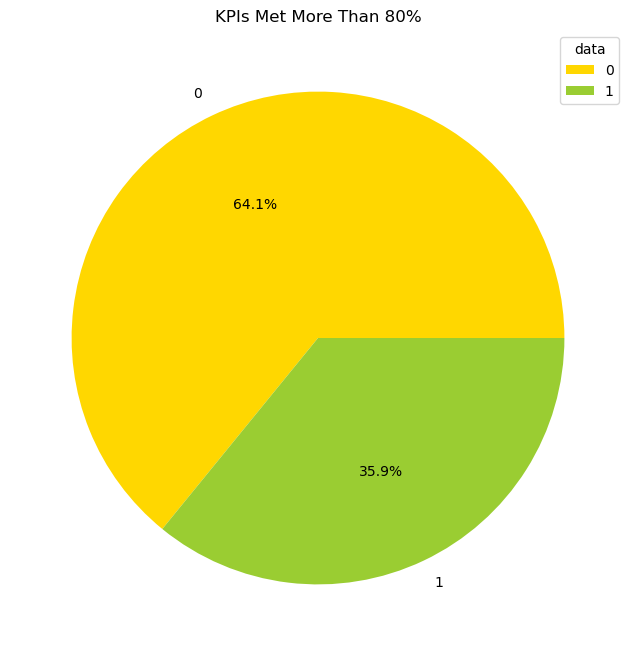

In [37]:
data = df['KPIs_Met_More_Than_80'].value_counts()
plt.figure(figsize=(15, 8))
color = ['gold', 'yellowgreen']
plt.pie(data, labels=data.index, autopct='%1.1f%%',colors = color)
plt.title('KPIs Met More Than 80%')
plt.legend(title= 'data')
plt.show()

In [38]:
pd.DataFrame(df.groupby('Gender')['KPIs_Met_More_Than_80'].value_counts())

count
Gender KPIs_Met_More_Than_80       
f      0                       3117
       1                       1985
m      0                       8048
       1                       4264

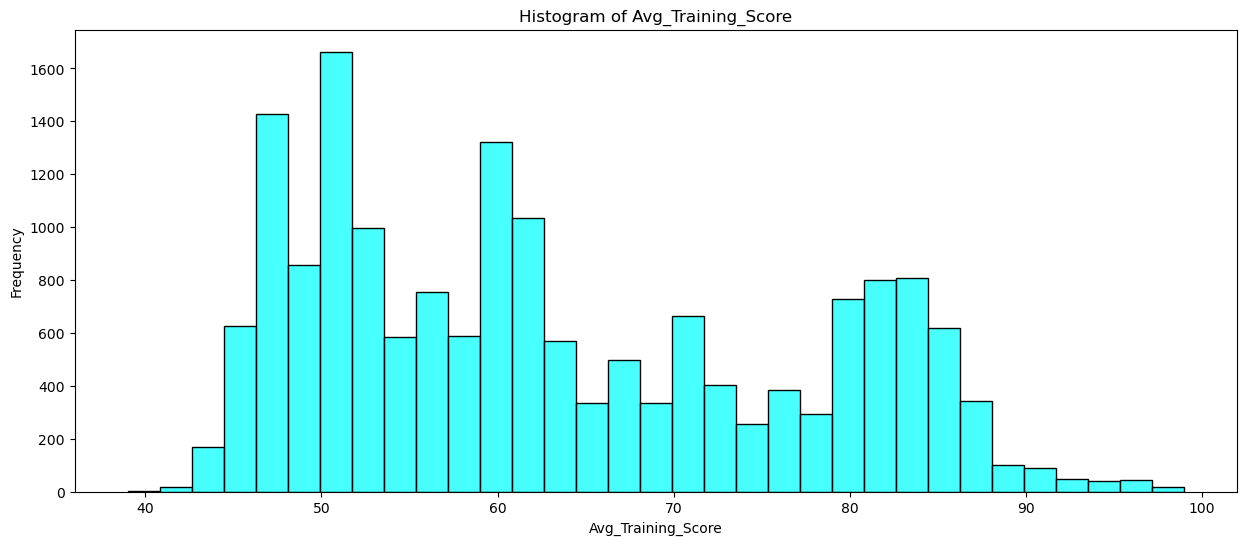

In [39]:
plt.figure(figsize=(15, 6))
sns.histplot(df['Avg_Training_Score'],color='#0AFFFF',edgecolor='k')
plt.title('Histogram of Avg_Training_Score')
plt.xlabel('Avg_Training_Score')
plt.ylabel('Frequency')
plt.show()

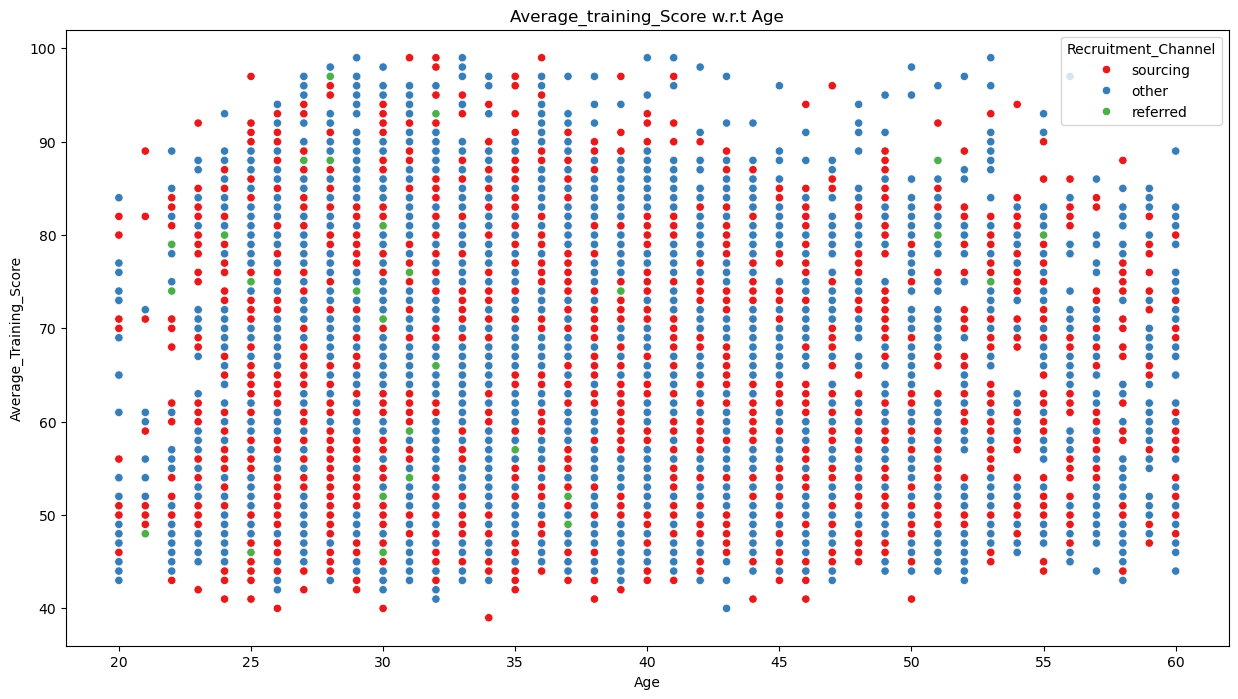

In [306]:
 plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Avg_Training_Score', data=df,hue='Recruitment_Channel',palette='Set1')
plt.title('Average_training_Score w.r.t Age')
plt.xlabel('Age')
plt.ylabel('Average_Training_Score')
plt.show()

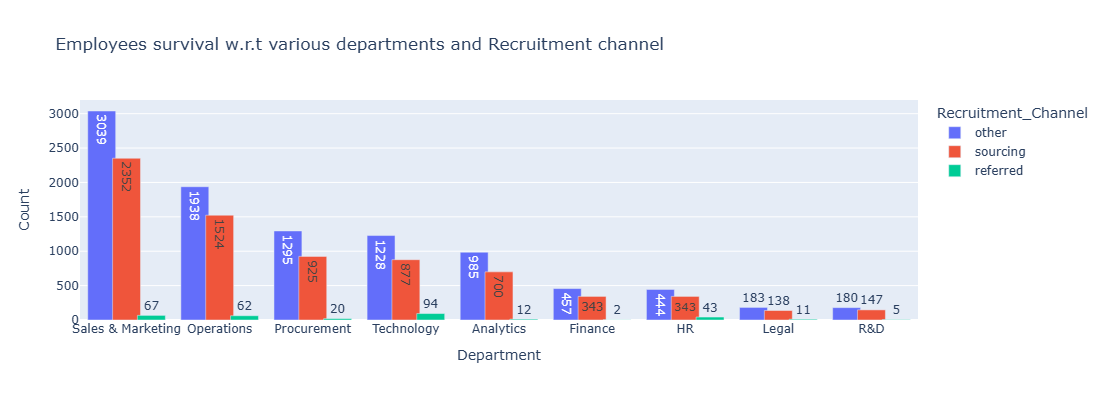

In [148]:
data = df.groupby(['Department','Recruitment_Channel'])['Duration_Of_Service'].count().reset_index()
data.columns = ['Department', 'Recruitment_Channel' , 'Count']
data = data.sort_values(by='Count', ascending=False)
fig = px.bar(data, x="Department", y='Count', color= 'Recruitment_Channel', title= 'Employees survival w.r.t various departments and Recruitment channel', barmode= 'group', text_auto=True)
fig.update_traces(width=0.3)
fig.update_layout(width=1100,height=400)
fig.show()

In [234]:
df['Avg_Training_Score'].describe()

count    17414.000000
mean        63.176697
std         13.418020
min         39.000000
25%         51.000000
50%         60.000000
75%         75.000000
max         99.000000
Name: Avg_Training_Score, dtype: float64

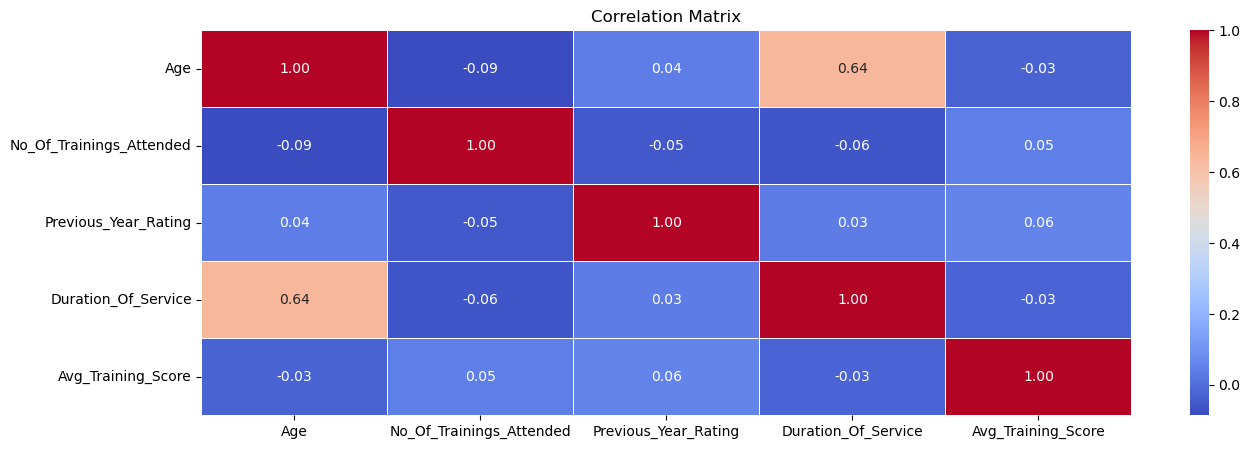

In [236]:
numerical_columns = ['Age', 'No_Of_Trainings_Attended', 'Previous_Year_Rating', 'Duration_Of_Service', 'Avg_Training_Score']
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(15, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [250]:
sorted_df = df.sort_values(by='Avg_Training_Score', ascending=False)
top_employees = sorted_df[['Employee_ID', 'Department']].head(5)
print(top_employees)

       Employee_ID         Department
4583         41351          Analytics
11189        70209         Technology
3506         44692  Sales & Marketing
1904         27916  Sales & Marketing
3847         23629         Operations


In [298]:
df['Random_Variable'] = np.random.rand(len(df))
print(df.head())

   Employee_ID         Department     Region  Education Gender  \
0         8724         Technology  region_26  Bachelors      m   
1        74430                 HR   region_4  Bachelors      f   
2        72255  Sales & Marketing  region_13  Bachelors      m   
3        38562        Procurement   region_2  Bachelors      f   
4        64486            Finance  region_29  Bachelors      m   

  Recruitment_Channel  No_Of_Trainings_Attended  Age  Previous_Year_Rating  \
0            sourcing                         1   24                   3.0   
1               other                         1   31                   3.0   
2               other                         1   31                   1.0   
3               other                         3   31                   2.0   
4            sourcing                         1   30                   4.0   

   Duration_Of_Service  KPIs_Met_More_Than_80  Awards_Won  Avg_Training_Score  \
0                    1                      1        

# Conclusion 